In [5]:
import pandas as pd

# df= pd.read_csv('AIS_data_01.csv')

df= pd.read_csv('final/AIS_file_01.csv')


In [6]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,316048178,2022-07-31T00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,NaN,7.0,2.0,NaN,NaN,B
1,316048178,2022-07-31T00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,NaN,7.0,2.0,NaN,NaN,B
2,368234360,2022-07-31T01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B
3,368234360,2022-07-31T01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B
4,368234360,2022-07-31T01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B


In [7]:
df.tail()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
6335396,316009843,2023-04-16T22:53:42,49.29802,-123.04117,9.3,285.8,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A
6335397,316009843,2023-04-16T22:54:53,49.29894,-123.04558,9.4,293.5,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A
6335398,316009843,2023-04-16T22:56:01,49.29988,-123.04986,9.4,288.7,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A
6335399,316009843,2023-04-16T22:57:33,49.30090,-123.05576,9.5,286.5,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A
6335400,316009843,2023-04-16T22:58:52,49.30173,-123.06094,9.5,282.2,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A


In [8]:
df.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335401 entries, 0 to 6335400
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MMSI              int64  
 1   BaseDateTime      object 
 2   LAT               float64
 3   LON               float64
 4   SOG               float64
 5   COG               float64
 6   Heading           float64
 7   VesselName        object 
 8   IMO               object 
 9   CallSign          object 
 10  VesselType        float64
 11  Status            float64
 12  Length            float64
 13  Width             float64
 14  Draft             float64
 15  Cargo             float64
 16  TransceiverClass  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 821.7+ MB


In [10]:
!pip install matplotlib

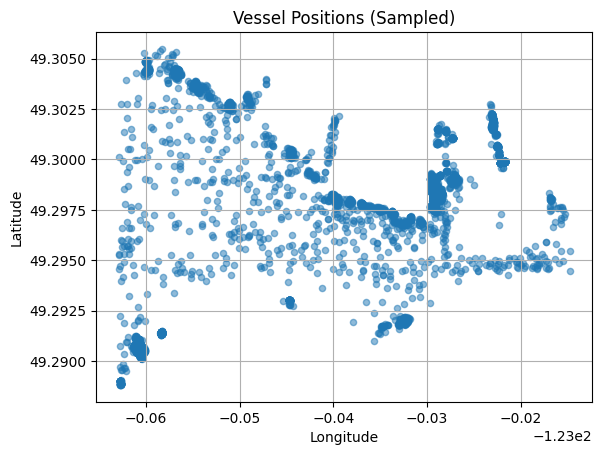

In [22]:
#Downsampling for plotting

import matplotlib.pyplot as plt

# Sample 10,000 random rows for visualization
sampled_data = df.sample(n=10000, random_state=42)

# Plot the sampled data
sampled_data.plot(kind="scatter", x="LON", y="LAT", alpha=0.5, grid=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Vessel Positions (Sampled)")
plt.show()

### Missing Values Analysis

In [11]:
df.isnull().any()

MMSI                False
BaseDateTime        False
LAT                 False
LON                 False
SOG                 False
COG                 False
Heading             False
VesselName           True
IMO                  True
CallSign             True
VesselType           True
Status               True
Length               True
Width                True
Draft                True
Cargo                True
TransceiverClass    False
dtype: bool

In [12]:
print("missing IMO: ",df['IMO'].isna().sum())

missing IMO:  1757791


In [13]:
print("missing MMSI: ",df['MMSI'].isna().sum())

missing MMSI:  0


In [14]:
#Missing Value Analysis

for column in df.columns:
    missing_count = df[column].isna().sum()
    print(f"Missing {column}: {missing_count}")

Missing MMSI: 0
Missing BaseDateTime: 0
Missing LAT: 0
Missing LON: 0
Missing SOG: 0
Missing COG: 0
Missing Heading: 0
Missing VesselName: 1336
Missing IMO: 1757791
Missing CallSign: 2010080
Missing VesselType: 10798
Missing Status: 318015
Missing Length: 755443
Missing Width: 808309
Missing Draft: 1087321
Missing Cargo: 318242
Missing TransceiverClass: 0


In [15]:
# Fill VesselName with 'UNKNOWN' where missing
df['VesselName'] = df['VesselName'].fillna('UNKNOWN')

# For IMO and CallSign, create a flag indicating missing values
df['has_IMO'] = df['IMO'].notna()
df['has_CallSign'] = df['CallSign'].notna()

In [16]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,has_IMO,has_CallSign
0,316048178,2022-07-31T00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,NaN,7.0,2.0,NaN,NaN,B,False,False
1,316048178,2022-07-31T00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,NaN,7.0,2.0,NaN,NaN,B,False,False
2,368234360,2022-07-31T01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B,False,True
3,368234360,2022-07-31T01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B,False,True
4,368234360,2022-07-31T01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,NaN,27.0,7.0,NaN,NaN,B,False,True


In [17]:
df.tail()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,has_IMO,has_CallSign
6335396,316009843,2023-04-16T22:53:42,49.29802,-123.04117,9.3,285.8,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A,False,False
6335397,316009843,2023-04-16T22:54:53,49.29894,-123.04558,9.4,293.5,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A,False,False
6335398,316009843,2023-04-16T22:56:01,49.29988,-123.04986,9.4,288.7,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A,False,False
6335399,316009843,2023-04-16T22:57:33,49.30090,-123.05576,9.5,286.5,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A,False,False
6335400,316009843,2023-04-16T22:58:52,49.30173,-123.06094,9.5,282.2,511.0,J R W,NaN,NaN,31.0,0.0,12.0,5.0,0.6,52.0,A,False,False


In [18]:
#AIS Vessel Type to Vessel Group

ais_to_vessel_group = {
    0: "Not Available",
    # 1-19 Reserved
    range(1, 20): "Other",
    20: "Other",  # Wing in ground (WIG)
    21: "Tug Tow",
    22: "Tug Tow",
    23: "Other",
    24: "Other",
    range(25, 30): "Other",  # WIG reserved
    30: "Fishing",
    31: "Tug Tow",
    32: "Tug Tow",
    33: "Other",  # Dredging
    34: "Other",  # Diving
    35: "Military",
    36: "Pleasure Craft/Sailing",
    37: "Pleasure Craft/Sailing",
    range(38, 40): "Other",  # Reserved
    range(40, 50): "Other",  # High speed craft
    50: "Other",  # Pilot Vessel
    51: "Other",  # Search and Rescue
    52: "Tug Tow",
    range(53, 60): "Other",
    range(60, 70): "Passenger",
    range(70, 80): "Cargo",
    range(80, 90): "Tanker",
    range(90, 100): "Other",
    range(100, 200): "Other",  # Regional use
    range(200, 256): "Other",  # Future use
    range(256, 1000): "Other",  # No designation
    1001: "Fishing",  # Commercial Fishing Vessel
    1002: "Fishing",  # Fish Processing Vessel
    1003: "Cargo",   # Freight Barge
    1004: "Cargo",   # Freight Ship
    range(1005, 1012): "Other",
    range(1012, 1016): "Passenger",
    1016: "Cargo",   # Public Freight
    1017: "Tanker",  # Public Tankship/Barge
    1018: "Other",   # Public Vessel, Unclassified
    1019: "Pleasure Craft/Sailing",  # Recreational
    1020: "Other",   # Research Vessel
    1021: "Military", # SAR Aircraft
    1022: "Other",   # School Ship
    1023: "Tug Tow", # Tank Barge
    1024: "Tanker",  # Tank Ship
    1025: "Tug Tow"  # Towing Vessel
}

# Function to get vessel group from AIS code
def get_vessel_group(ais_code):
    if ais_code in ais_to_vessel_group:
        return ais_to_vessel_group[ais_code]
    
    # Check range mappings
    for key in ais_to_vessel_group:
        if isinstance(key, range) and ais_code in key:
            return ais_to_vessel_group[key]
    
    return "Other"  # Default case

In [19]:
#Adding vessel group to data frame

df['VesselGroup'] = df['VesselType'].apply(get_vessel_group)

# Get distribution of vessel groups
vessel_group_distribution = df['VesselGroup'].value_counts()
print("\nVessel Group Distribution:")
print(vessel_group_distribution)


Vessel Group Distribution:
VesselGroup
Tug Tow                   4232869
Fishing                    745025
Cargo                      703145
Other                      383048
Pleasure Craft/Sailing     174047
Passenger                   67002
Tanker                      24155
Not Available                6043
Military                       67
Name: count, dtype: int64


In [20]:
!pip install seaborn

C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\3237651605.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=vessel_group_distribution.index, y=vessel_group_distribution.values, palette="viridis")


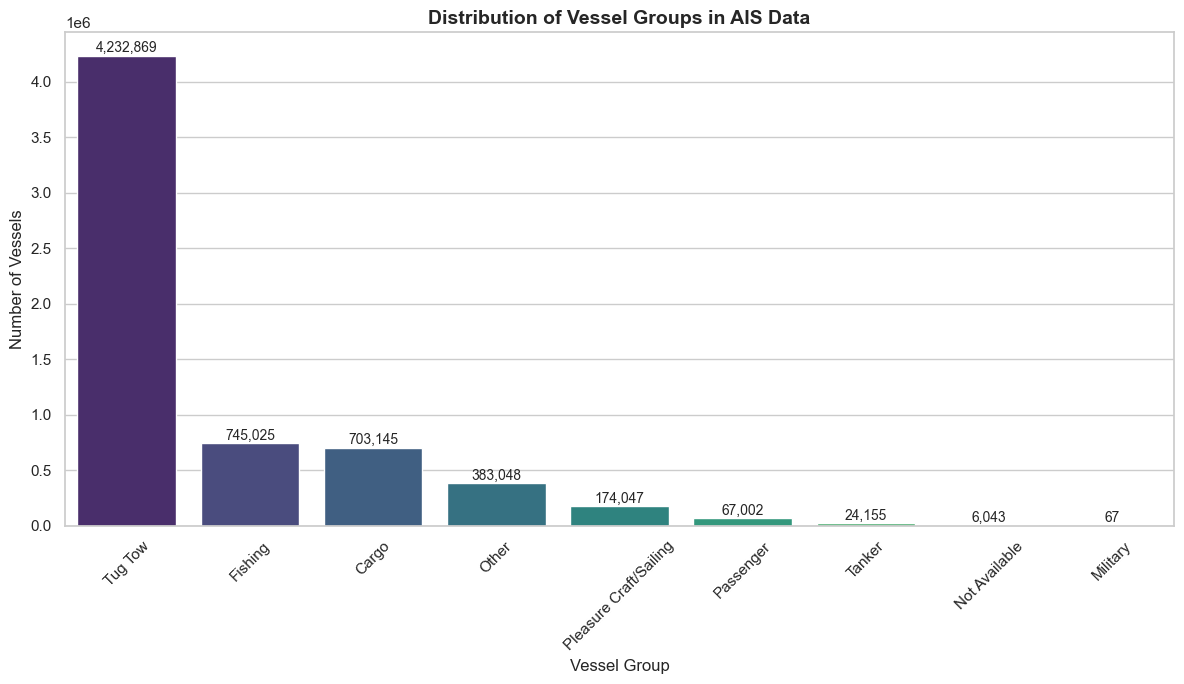

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Sort the distribution for better visualization
vessel_group_distribution = df['VesselGroup'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=vessel_group_distribution.index, y=vessel_group_distribution.values, palette="viridis")

# Add labels to each bar
for i, value in enumerate(vessel_group_distribution.values):
    plt.text(i, value + 5000, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Plot enhancements
plt.xlabel('Vessel Group', fontsize=12)
plt.ylabel('Number of Vessels', fontsize=12)
plt.title('Distribution of Vessel Groups in AIS Data', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



Filtered Vessel Group Distribution (Excluding Tug Tow):


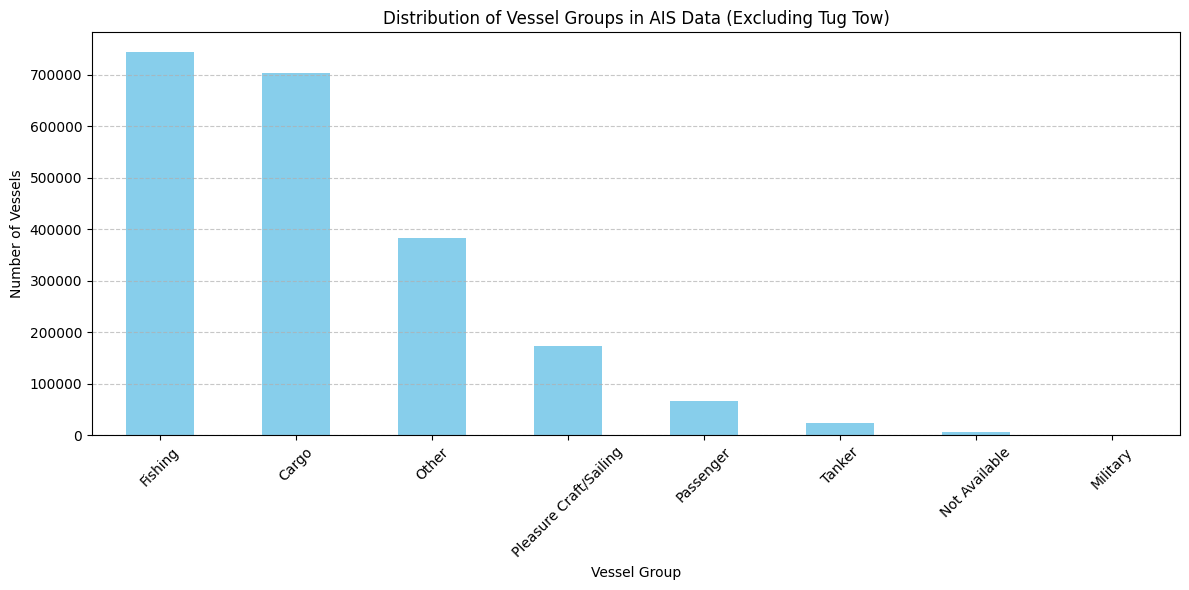

In [21]:
# Filter out 'Tug Tow' for focused analysis
filtered_df = df[df['VesselGroup'] != 'Tug Tow']

# Check the updated distribution
filtered_distribution = filtered_df['VesselGroup'].value_counts()
print("\nFiltered Vessel Group Distribution (Excluding Tug Tow):")
# print(filtered_distribution)

# Plot the updated distribution without 'Tug Tow'
plt.figure(figsize=(12, 6))
filtered_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Vessel Group')
plt.ylabel('Number of Vessels')
plt.title('Distribution of Vessel Groups in AIS Data (Excluding Tug Tow)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [22]:
# Handle VesselType (important for classification)
df['VesselType'] = df['VesselType'].fillna(-1)  # Special code for unknown

# Handle Status
df['Status'] = df['Status'].fillna(-1)  # Special code for unknown

# For physical characteristics, use median per vessel type
# First, group by vessel type and calculate medians (not using mean as it's heavily influenced by outliers and erroneous entries)
vessel_type_medians = df.groupby('VesselType').agg({
    'Length': 'median',
    'Width': 'median',
    'Draft': 'median'
}).to_dict()

print(vessel_type_medians)

{'Length': {-1.0: 229.0, 0.0: 0.0, 9.0: 199.0, 30.0: 41.0, 31.0: 28.0, 32.0: 15.0, 33.0: 8.0, 34.0: 10.0, 35.0: 7.0, 36.0: 0.0, 37.0: 13.0, 38.0: 0.0, 50.0: 11.0, 51.0: 14.0, 52.0: 23.0, 53.0: 13.0, 54.0: 11.0, 57.0: 139.0, 60.0: 27.0, 67.0: 10.0, 70.0: 200.0, 71.0: nan, 72.0: 224.0, 79.0: 229.0, 80.0: 169.0, 81.0: 159.0, 82.0: 175.0, 83.0: 195.0, 89.0: 183.0, 90.0: 74.0, 97.0: 13.0, 99.0: 21.0}, 'Width': {-1.0: 5.0, 0.0: 0.0, 9.0: 31.0, 30.0: 11.0, 31.0: 10.0, 32.0: 6.0, 33.0: 4.0, 34.0: 4.0, 35.0: 3.0, 36.0: 0.0, 37.0: 4.0, 38.0: 0.0, 50.0: nan, 51.0: 4.0, 52.0: 12.0, 53.0: 3.0, 54.0: 4.0, 57.0: 22.0, 60.0: 7.0, 67.0: 3.0, 70.0: 32.0, 71.0: nan, 72.0: 32.0, 79.0: 37.0, 80.0: 27.0, 81.0: 27.0, 82.0: 27.0, 83.0: 32.0, 89.0: 32.0, 90.0: 20.0, 97.0: 4.0, 99.0: 7.0}, 'Draft': {-1.0: 2.1, 0.0: 1.1, 9.0: 8.5, 30.0: 5.7, 31.0: 4.0, 32.0: 3.0, 33.0: nan, 34.0: nan, 35.0: nan, 36.0: 2.1, 37.0: 2.1, 38.0: nan, 50.0: nan, 51.0: nan, 52.0: 4.2, 53.0: 1.8, 54.0: 1.0, 57.0: 6.6, 60.0: 3.1, 67.0: 1.

In [23]:
# Then fill missing values based on vessel type
for characteristic in ['Length', 'Width', 'Draft']:
    df[characteristic] = df.apply(
        lambda x: vessel_type_medians[characteristic][x['VesselType']]
        if pd.isna(x[characteristic]) and not pd.isna(x['VesselType'])
        else x[characteristic],
        axis=1
    )

# Fill remaining missing values with overall medians
df['Length'] = df['Length'].fillna(df['Length'].median())
df['Width'] = df['Width'].fillna(df['Width'].median())
df['Draft'] = df['Draft'].fillna(df['Draft'].median())

# Handle Cargo
df['Cargo'] = df['Cargo'].fillna(-1)  # Special code for unknown

In [24]:
#Missing Value Analysis

for column in df.columns:
    missing_count = df[column].isna().sum()
    print(f"Missing {column}: {missing_count}")

Missing MMSI: 0
Missing BaseDateTime: 0
Missing LAT: 0
Missing LON: 0
Missing SOG: 0
Missing COG: 0
Missing Heading: 0
Missing VesselName: 0
Missing IMO: 1757791
Missing CallSign: 2010080
Missing VesselType: 0
Missing Status: 0
Missing Length: 0
Missing Width: 0
Missing Draft: 0
Missing Cargo: 0
Missing TransceiverClass: 0
Missing has_IMO: 0
Missing has_CallSign: 0
Missing VesselGroup: 0


In [25]:
df2 = df[df['VesselGroup'] != 'Tug Tow']

In [37]:
corr_matrix= df2.corr()


ValueError: could not convert string to float: '2022-07-31T00:19:15'

In [26]:
df2.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,has_IMO,has_CallSign,VesselGroup
0,316048178,2022-07-31T00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
1,316048178,2022-07-31T00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
2,368234360,2022-07-31T01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
3,368234360,2022-07-31T01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
4,368234360,2022-07-31T01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing


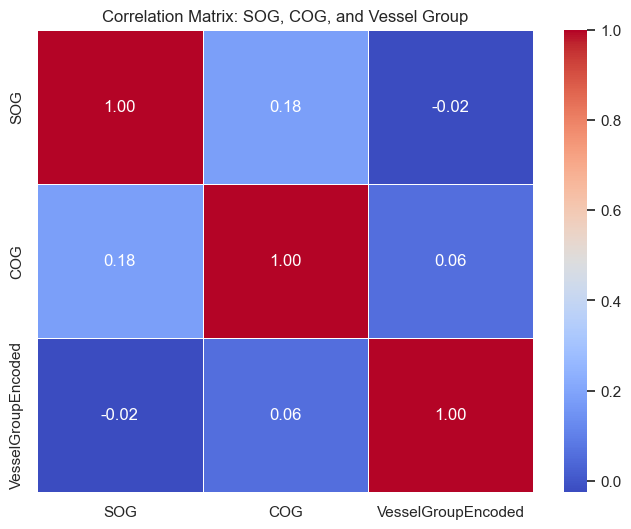

In [40]:
#Computing Pearson correlations between:
#SOG (Speed Over Ground)
#COG (Course Over Ground)
#VesselGroup

# Encode VesselGroup as numeric for correlation analysis
df2_encoded = df2.copy()
df2_encoded['VesselGroupEncoded'] = df2_encoded['VesselGroup'].astype('category').cat.codes

# Select relevant columns for correlation analysis
correlation_data = df2_encoded[['SOG', 'COG', 'VesselGroupEncoded']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: SOG, COG, and Vessel Group')
plt.show()

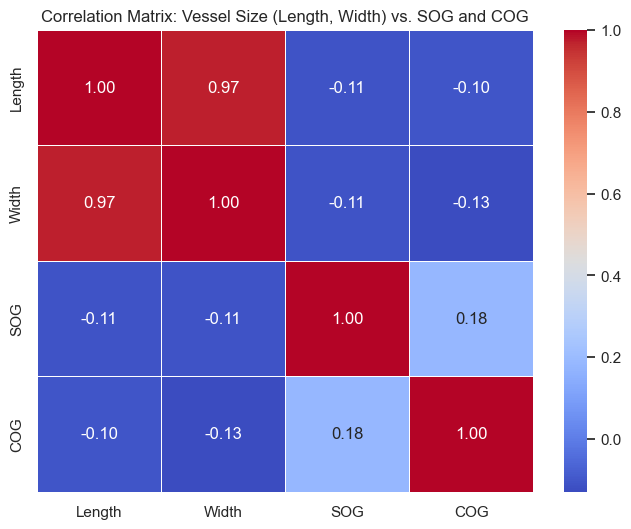

In [41]:
#Analyzing How Vessel Size Affects SOG and COG


# 1. Correlation Analysis between Vessel Size (Length, Width) and SOG/COG
size_speed_course_data = df2[['Length', 'Width', 'SOG', 'COG']]

# Compute the correlation matrix
size_correlation_matrix = size_speed_course_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(size_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Vessel Size (Length, Width) vs. SOG and COG')
plt.show()


In [46]:
# Convert BaseDateTime to DateTime Format

df2['BaseDateTime'] = pd.to_datetime(df2['BaseDateTime'])
df2.set_index('BaseDateTime', inplace=True)  # Set as index for time-based operations


KeyError: 'BaseDateTime'

In [45]:
# Ensure BaseDateTime is in datetime format
df2['BaseDateTime'] = pd.to_datetime(df2['BaseDateTime'])


# Extracting time-based features
df2['hour'] = df2['BaseDateTime'].dt.hour           # Hour of the day (0-23)
df2['day'] = df2['BaseDateTime'].dt.day             # Day of the month (1-31)
df2['month'] = df2['BaseDateTime'].dt.month         # Month (1-12)
df2['day_of_week'] = df2['BaseDateTime'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df2['week'] = df2['BaseDateTime'].dt.isocalendar().week  # ISO week number (1-53)

# Display the updated DataFrame with new temporal features
df2.head()


KeyError: 'BaseDateTime'

In [47]:
df2 = df[df['VesselGroup'] != 'Tug Tow']

In [48]:
# Ensure BaseDateTime is in datetime format
df2['BaseDateTime'] = pd.to_datetime(df2['BaseDateTime'])


C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\786254256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BaseDateTime'] = pd.to_datetime(df2['BaseDateTime'])


In [49]:
df2.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,has_IMO,has_CallSign,VesselGroup
0,316048178,2022-07-31 00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
1,316048178,2022-07-31 00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
2,368234360,2022-07-31 01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
3,368234360,2022-07-31 01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
4,368234360,2022-07-31 01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing


In [28]:
# Extracting time-based features
df2['hour'] = df2['BaseDateTime'].dt.hour           # Hour of the day (0-23)
df2['day'] = df2['BaseDateTime'].dt.day             # Day of the month (1-31)
df2['month'] = df2['BaseDateTime'].dt.month         # Month (1-12)
df2['day_of_week'] = df2['BaseDateTime'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df2['week'] = df2['BaseDateTime'].dt.isocalendar().week  # ISO week number (1-53)

# Display the updated DataFrame with new temporal features
df2.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102532 entries, 0 to 6335376
Data columns (total 25 columns):
 #   Column            Dtype         
---  ------            -----         
 0   MMSI              int64         
 1   BaseDateTime      datetime64[ns]
 2   LAT               float64       
 3   LON               float64       
 4   SOG               float64       
 5   COG               float64       
 6   Heading           float64       
 7   VesselName        object        
 8   IMO               object        
 9   CallSign          object        
 10  VesselType        float64       
 11  Status            float64       
 12  Length            float64       
 13  Width             float64       
 14  Draft             float64       
 15  Cargo             float64       
 16  TransceiverClass  object        
 17  has_IMO           bool          
 18  has_CallSign      bool          
 19  VesselGroup       object        
 20  hour              int32         
 21  day          

In [29]:
# Check time span of the data
time_span = df2['BaseDateTime'].agg(['min', 'max'])
print("Data spans from:", time_span)

# Check average signals per vessel
signals_per_vessel = df2.groupby('MMSI').size().describe()
print("\nSignals per vessel statistics:", signals_per_vessel)


Data spans from: min    2022-07-31T00:00:02
max    2023-05-01T23:59:58
Name: BaseDateTime, dtype: object

Signals per vessel statistics: count      1162.000000
mean       1809.407917
std       12884.041610
min           1.000000
25%          28.000000
50%         254.000000
75%        1067.000000
max      233159.000000
dtype: float64


In [30]:
#Printing nicely

# Check time span of the data
time_span = df2['BaseDateTime'].agg(['min', 'max'])
print(f"📅 Data Time Span:\n------------------\nStart Date: {time_span['min']}\nEnd Date:   {time_span['max']}")

# Check average signals per vessel
signals_per_vessel = df2.groupby('MMSI').size().describe()

print("\n📊 Signals per Vessel Statistics:\n---------------------------------")
print(f"Count of Vessels  : {signals_per_vessel['count']:.0f}")
print(f"Mean Signals      : {signals_per_vessel['mean']:.2f}")
print(f"Min Signals       : {signals_per_vessel['min']:.0f}")
print(f"25th Percentile   : {signals_per_vessel['25%']:.0f}")
print(f"Median Signals    : {signals_per_vessel['50%']:.0f}")
print(f"75th Percentile   : {signals_per_vessel['75%']:.0f}")
print(f"Max Signals       : {signals_per_vessel['max']:.0f}")


📅 Data Time Span:
------------------
Start Date: 2022-07-31T00:00:02
End Date:   2023-05-01T23:59:58

📊 Signals per Vessel Statistics:
---------------------------------
Count of Vessels  : 1162
Mean Signals      : 1809.41
Min Signals       : 1
25th Percentile   : 28
Median Signals    : 254
75th Percentile   : 1067
Max Signals       : 233159


In [31]:
df2.head(15)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,has_IMO,has_CallSign,VesselGroup
0,316048178,2022-07-31T00:19:15,49.29494,-123.01942,17.4,265.9,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
1,316048178,2022-07-31T00:20:31,49.29547,-123.02952,21.3,280.8,511.0,FASTNET,NaN,NaN,37.0,-1.0,7.0,2.0,2.1,-1.0,B,False,False,Pleasure Craft/Sailing
2,368234360,2022-07-31T01:22:16,49.29778,-123.06112,11.7,97.3,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
3,368234360,2022-07-31T01:23:17,49.29739,-123.05597,12.1,96.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
4,368234360,2022-07-31T01:24:18,49.29709,-123.05140,7.4,95.4,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
5,368234360,2022-07-31T01:25:50,49.29691,-123.04703,6.4,97.5,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
6,368234360,2022-07-31T01:27:18,49.29653,-123.04307,6.6,96.7,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
7,368234360,2022-07-31T01:28:19,49.29631,-123.04013,6.6,96.9,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
8,368234360,2022-07-31T01:29:47,49.29587,-123.03592,6.4,97.1,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing
9,368234360,2022-07-31T01:32:17,49.29534,-123.02944,4.0,95.7,511.0,ONE SHOT,NaN,WDM7473,37.0,-1.0,27.0,7.0,2.1,-1.0,B,False,True,Pleasure Craft/Sailing


In [32]:
# Sort the dataframe by MMSI and timestamp
df2 = df2.sort_values(['MMSI', 'BaseDateTime'])

In [33]:
# Now calculate transmission intervals
df2['transmission_interval'] = df2.groupby('MMSI')['BaseDateTime'].diff().dt.total_seconds()

# Get statistics
transmission_stats = df2['transmission_interval'].describe()
print("\nTransmission interval statistics (seconds):", transmission_stats)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

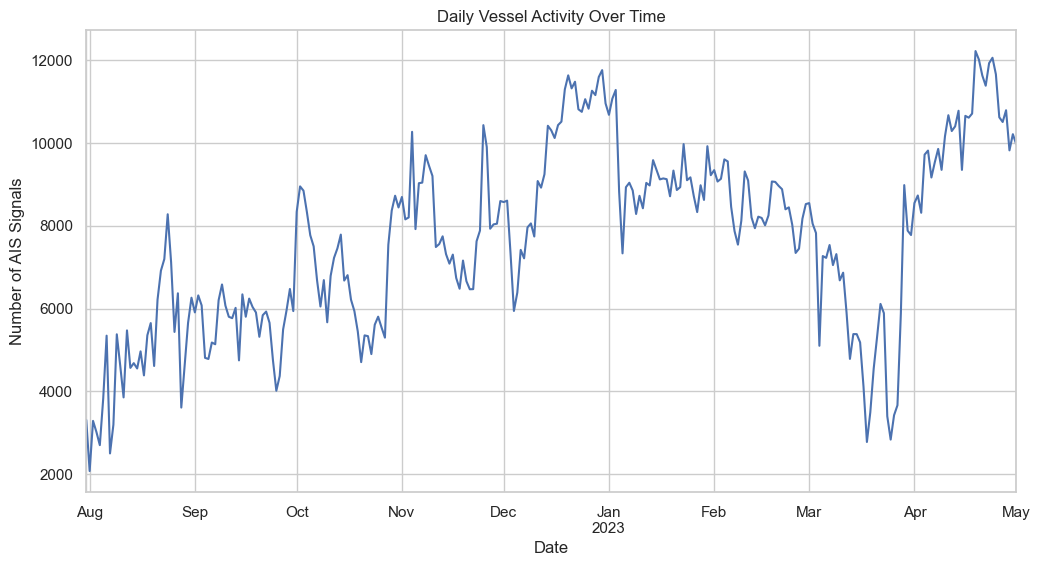

In [63]:

# 1. Plot number of signals over time (daily)
daily_counts = df2.resample('D', on='BaseDateTime').size()

plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.xlabel('Date')
plt.ylabel('Number of AIS Signals')
plt.title('Daily Vessel Activity Over Time')
plt.grid(True)
plt.show()

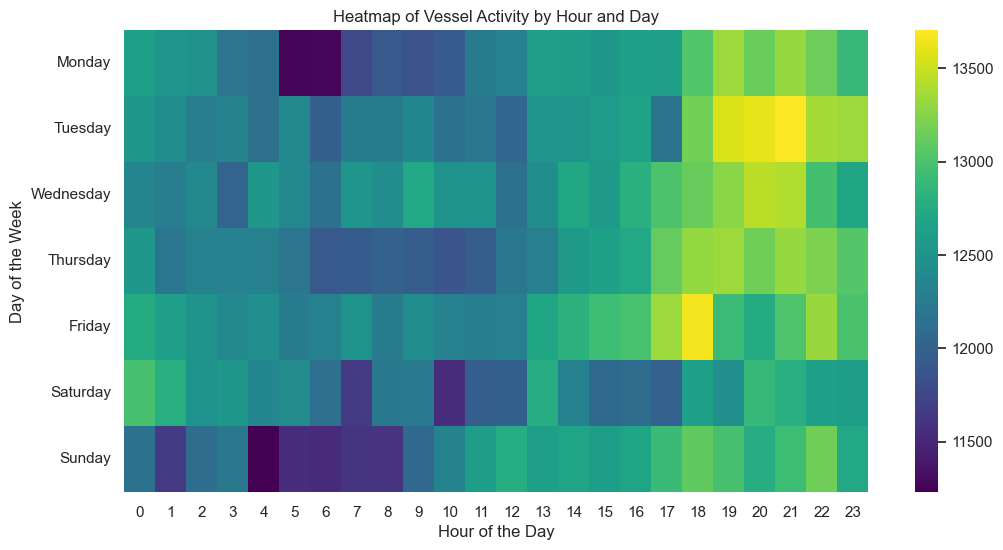

In [62]:


# Map day_of_week numbers to actual day names
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group and reshape the data
heatmap_data = df2.groupby(['day_of_week', 'hour']).size().unstack()

plt.figure(figsize=(12, 6))

# Create heatmap with day labels
sns.heatmap(heatmap_data, cmap='viridis', annot=False, yticklabels=day_labels)

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Heatmap of Vessel Activity by Hour and Day')
plt.show()


In [66]:
# 2. Check for missing dates in the time series
daily_counts = df2.resample('D', on='BaseDateTime').size()
missing_days = daily_counts[daily_counts == 0]

print(f"\n🚨 Number of missing days: {missing_days.size}")
if missing_days.size > 0:
    print("Missing days:\n", missing_days.index.tolist())
else:
    print("✅ No missing days detected.")


🚨 Number of missing days: 0
✅ No missing days detected.


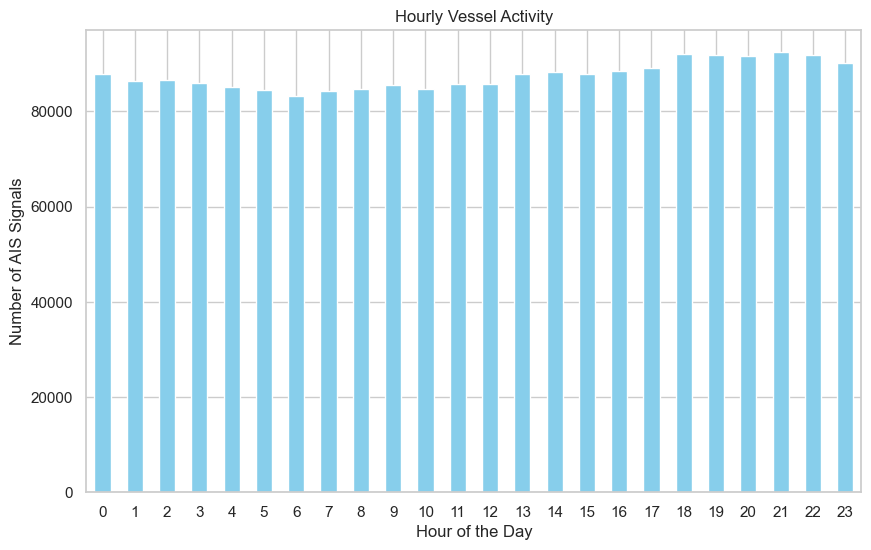

In [67]:
# Aggregate AIS signals by hour of the day
hourly_activity = df2.groupby('hour').size()

# Plot hourly activity
plt.figure(figsize=(10, 6))
hourly_activity.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of AIS Signals')
plt.title('Hourly Vessel Activity')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


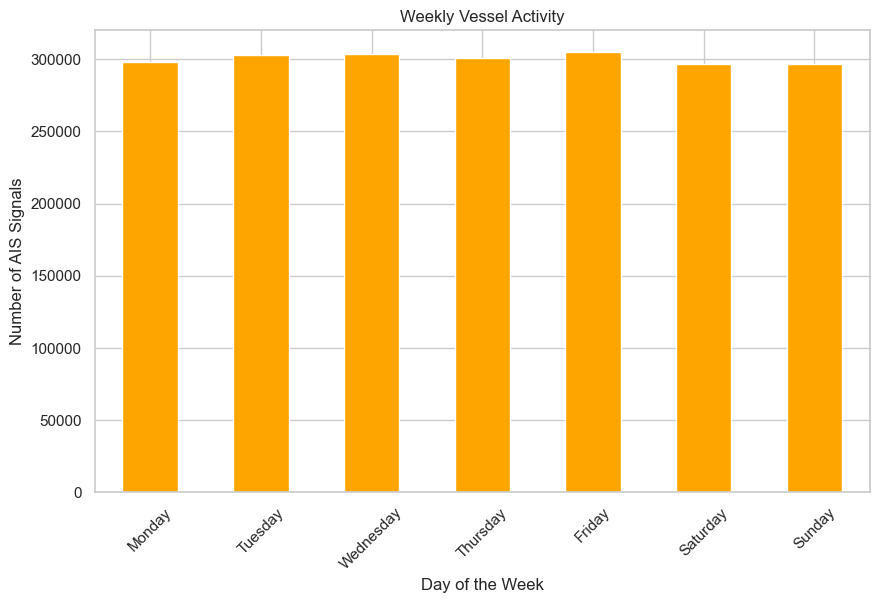

In [68]:
# Aggregate AIS signals by day of the week
weekly_activity = df2.groupby('day_of_week').size()
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot weekly activity
plt.figure(figsize=(10, 6))
weekly_activity.plot(kind='bar', color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Number of AIS Signals')
plt.title('Weekly Vessel Activity')
plt.xticks(ticks=range(7), labels=day_labels, rotation=45)
plt.grid(True)
plt.show()


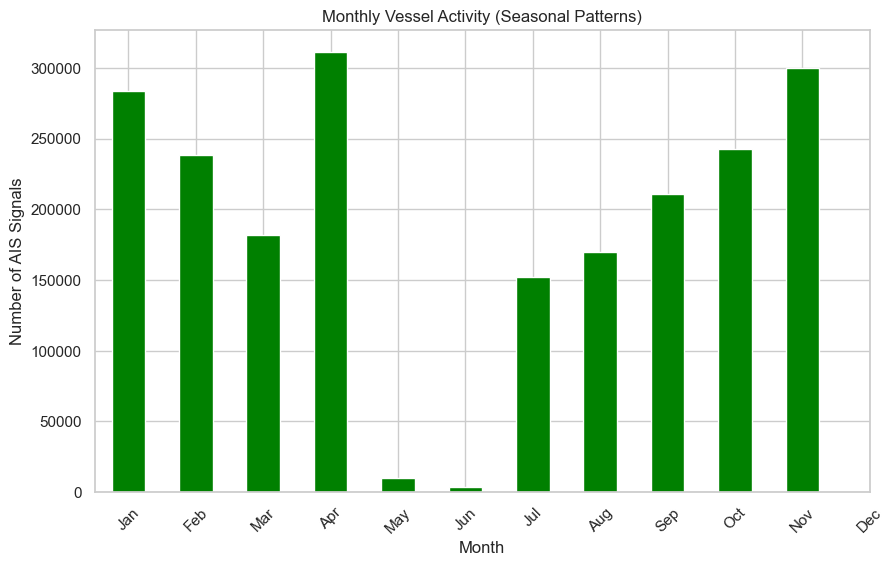

In [70]:
# Aggregate AIS signals by month
monthly_activity = df2.groupby('month').size()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot monthly activity
plt.figure(figsize=(10, 6))
monthly_activity.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Number of AIS Signals')
plt.title('Monthly Vessel Activity (Seasonal Patterns)')
plt.xticks(ticks=range(12), labels=month_labels, rotation=45)
plt.grid(True)
plt.show()


For report: The sharp drop in May–June could also indicate possible missing data or transmission gaps. Validation is needed to confirm whether this pattern reflects vessel operations or data inconsistencies. You can write how : Anomalies could indicate unauthorized vessel activity, malfunctioning AIS systems, or cyber intrusions (e.g., spoofed AIS signals). Sudden drops in activity during peak seasons might indicate communication disruptions or system sabotage. AIS spoofing attacks and GPS jamming are common cyber threats where false data is transmitted to mask real vessel movements or create phantom vessels. If a vessel broadcasts signals during unusual hours (e.g., sudden spikes during typically inactive periods), this could suggest malicious interference. Drastic changes in seasonal activity without operational justification might also reveal coordinated cyber-physical threats. Pattern deviation detection can trigger alerts for cybersecurity checks on vessels exhibiting abnormal behavior.



Can this be related to Iran ship deal?


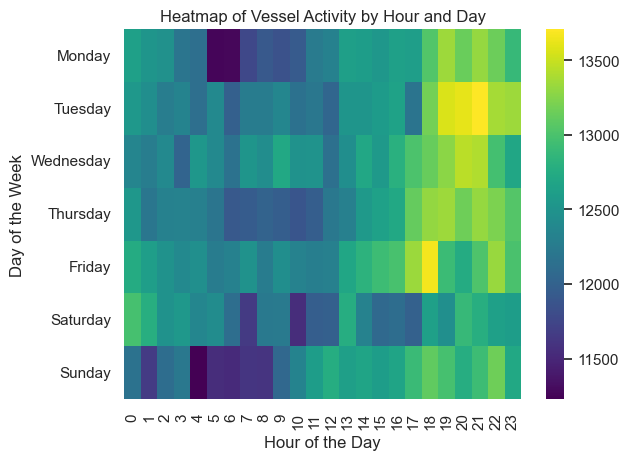

In [71]:
# Uncover hourly patterns across different days of the week.
# Detect operational hotspots.

# Use a heatmap to show the relationship between hourly and daily activity.

# Heatmap of day vs. hour
heatmap_data = df2.groupby(['day_of_week', 'hour']).size().unstack()

# Plot heatmap
sns.heatmap(heatmap_data, cmap='viridis', yticklabels=day_labels)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Heatmap of Vessel Activity by Hour and Day')
plt.show()


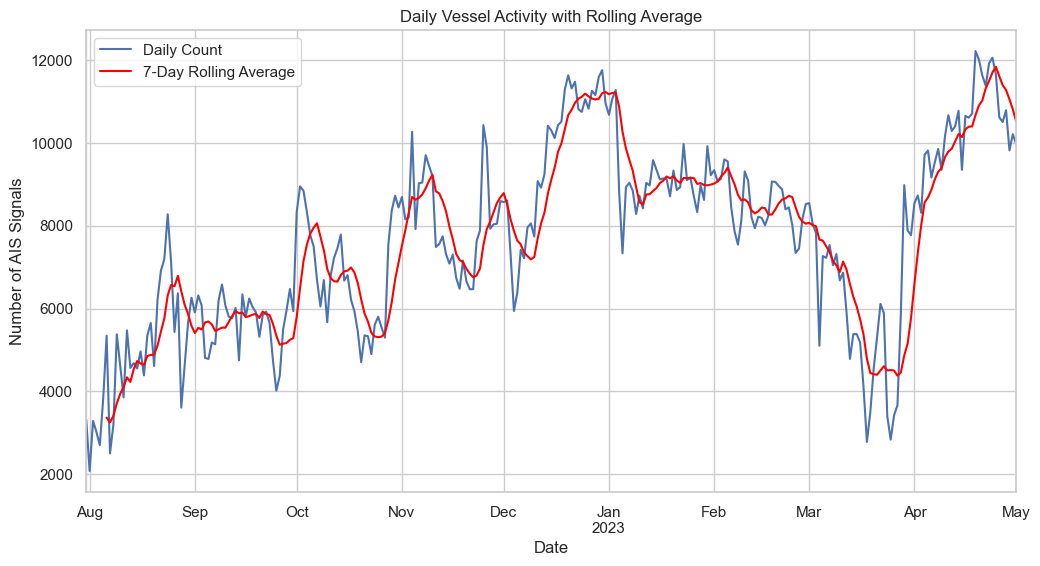

In [72]:
#Let's Smooth out short-term fluctuations to highlight long-term trends.

# 7-day rolling average for daily activity
rolling_daily = daily_counts.rolling(window=7).mean()

# Plot with rolling average
daily_counts.plot(figsize=(12, 6), label='Daily Count')
rolling_daily.plot(color='red', label='7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of AIS Signals')
plt.title('Daily Vessel Activity with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()



The rolling average provides a benchmark for typical vessel activity. Sudden spikes or drops that deviate from this trend could indicate anomalous behavior.
Sharp declines (e.g., in March) could signal system failures, AIS spoofing, or jamming attacks.

Rolling Average Smoothing:

The 7-day rolling average (in red) smooths out daily volatility, making it easier to detect sustained increases or decreases in vessel activity.
Persistent deviations from this smoothed line can signal potential anomalies.


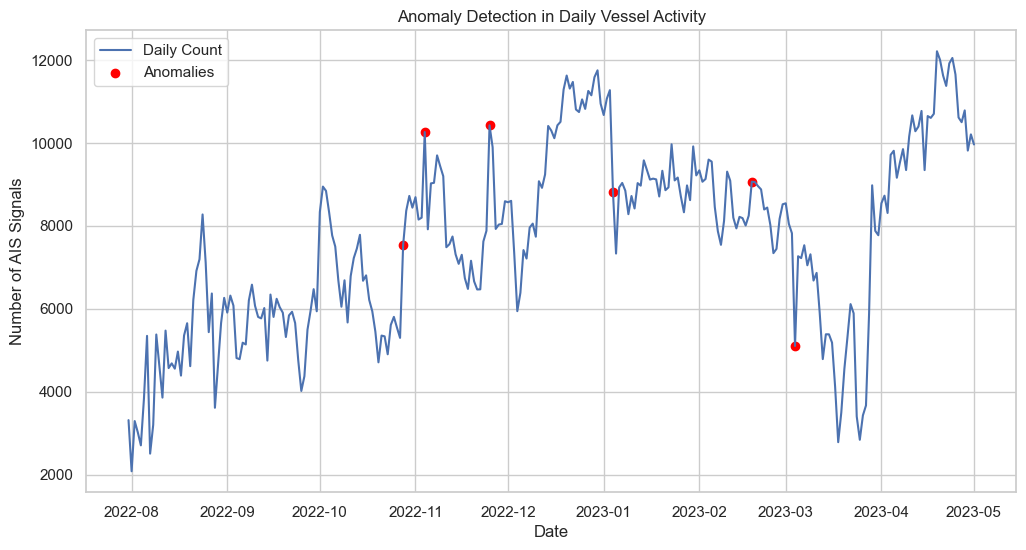

In [73]:
# Anomaly detection using rolling window
rolling_mean = daily_counts.rolling(window=7).mean()
rolling_std = daily_counts.rolling(window=7).std()

# Define anomaly threshold
upper_threshold = rolling_mean + 2 * rolling_std
lower_threshold = rolling_mean - 2 * rolling_std

# Detect anomalies
anomalies = daily_counts[(daily_counts > upper_threshold) | (daily_counts < lower_threshold)]

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(daily_counts, label='Daily Count')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Number of AIS Signals')
plt.title('Anomaly Detection in Daily Vessel Activity')
plt.legend()
plt.grid(True)
plt.show()


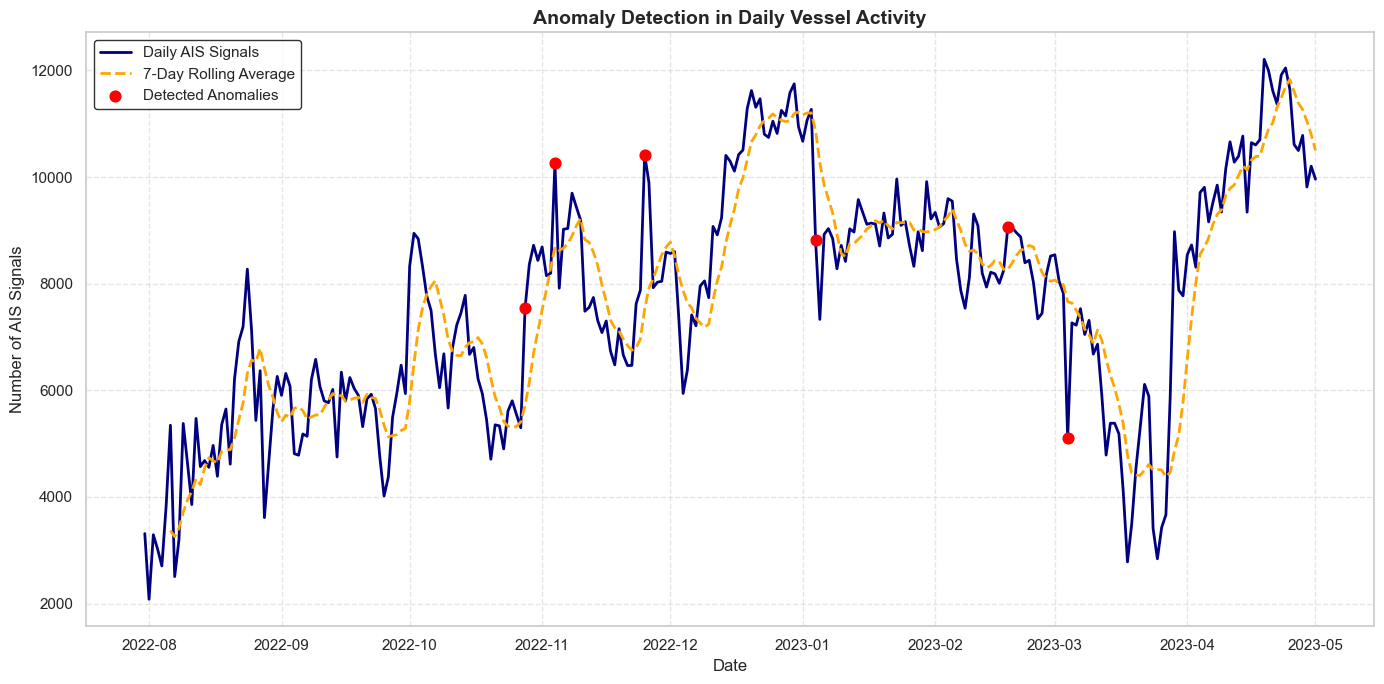

In [77]:
# Create the plot
plt.figure(figsize=(14, 7))

# Plot Daily AIS Signal Count
plt.plot(daily_counts, color='navy', linewidth=2, label='Daily AIS Signals')

# Plot 7-Day Rolling Average
plt.plot(rolling_mean, color='orange', linestyle='--', linewidth=2, label='7-Day Rolling Average')

# Highlight Anomalies with Red Dots
plt.scatter(anomalies.index, anomalies.values, color='red', s=60, label='Detected Anomalies', zorder=5)

# Titles and Labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of AIS Signals', fontsize=12)
plt.title('Anomaly Detection in Daily Vessel Activity', fontsize=14, fontweight='bold')

# Add a legend with a clear border
plt.legend(fontsize=11, frameon=True, edgecolor='black')

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Data Preparation for Machine Learning

In [78]:
# Check for missing values in selected features

# Numerical Features
numerical_features = ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft']

# Categorical Feature
categorical_features = ['VesselGroup']

# Temporal Features
temporal_features = ['hour', 'day_of_week', 'month']

# Combine all features
all_features = numerical_features + categorical_features + temporal_features

# Print missing values for each feature
for feature in all_features:
    missing_count = df2[feature].isna().sum()
    print(f"Missing values in {feature}: {missing_count}")


Missing values in SOG: 0
Missing values in COG: 0
Missing values in Heading: 0
Missing values in Length: 0
Missing values in Width: 0
Missing values in Draft: 0
Missing values in VesselGroup: 0
Missing values in hour: 0
Missing values in day_of_week: 0
Missing values in month: 0


## unsupervised anomaly detection models.

### Isolation Forest

In [79]:
!pip install scikit-learn

StandardScaler transforms data to have:
Mean = 0
Standard Deviation = 1 
Features like Length and Width (large values) won't dominate features like SOG or COG (smaller values).

Focusing on only relevant features here: ('SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft', 'VesselGroup', 'hour', 'day_of_week', 'month')

In [80]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Select Relevant Features
features = ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft', 'VesselGroup', 'hour', 'day_of_week', 'month']
df_features = df2[features].copy()

# Step 2: Encode Categorical Features (VesselGroup)
label_encoder = LabelEncoder()
df_features['VesselGroup'] = label_encoder.fit_transform(df_features['VesselGroup'])

# Step 3: Apply Standard Scaling to Numerical Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Optional: Convert back to DataFrame for better readability
df_scaled = pd.DataFrame(df_scaled, columns=features)

print("✅ Feature scaling complete. df_scaled is ready for model training!")
df_scaled.head()


✅ Feature scaling complete. df_scaled is ready for model training!


,SOG,COG,Heading,Length,Width,Draft,VesselGroup,hour,day_of_week,month
0,-0.149336,0.766901,1.372128,-0.935061,-1.079394,-1.520716,0.565574,1.052498,1.508501,-0.616017
1,0.381174,-0.795466,-1.063271,1.508913,-0.996511,-1.005705,1.048230,1.483376,-0.999225,0.356645
2,0.411928,-0.766548,-1.040616,1.508913,-0.996511,-1.005705,1.048230,1.483376,-0.999225,0.356645
3,0.434993,-0.706303,-1.000970,1.508913,-0.996511,-1.005705,1.048230,1.483376,-0.999225,0.356645
4,0.442682,-0.684614,-0.983979,1.508913,-0.996511,-1.005705,1.048230,1.483376,-0.999225,0.356645


In [81]:
from sklearn.ensemble import IsolationForest

# Step 1: Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100,  # Number of trees
                             contamination=0.01,  # Approx. 1% anomalies
                             random_state=42)

# Step 2: Train the model on the scaled data
iso_forest.fit(df_scaled)

# Step 3: Predict anomalies (-1 = anomaly, 1 = normal)
df2['Anomaly'] = iso_forest.predict(df_scaled)

# Step 4: Count how many anomalies were detected
anomaly_count = (df2['Anomaly'] == -1).sum()
print(f"🚨 Number of anomalies detected: {anomaly_count}")


🚨 Number of anomalies detected: 20995


C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\2324934762.py:20: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


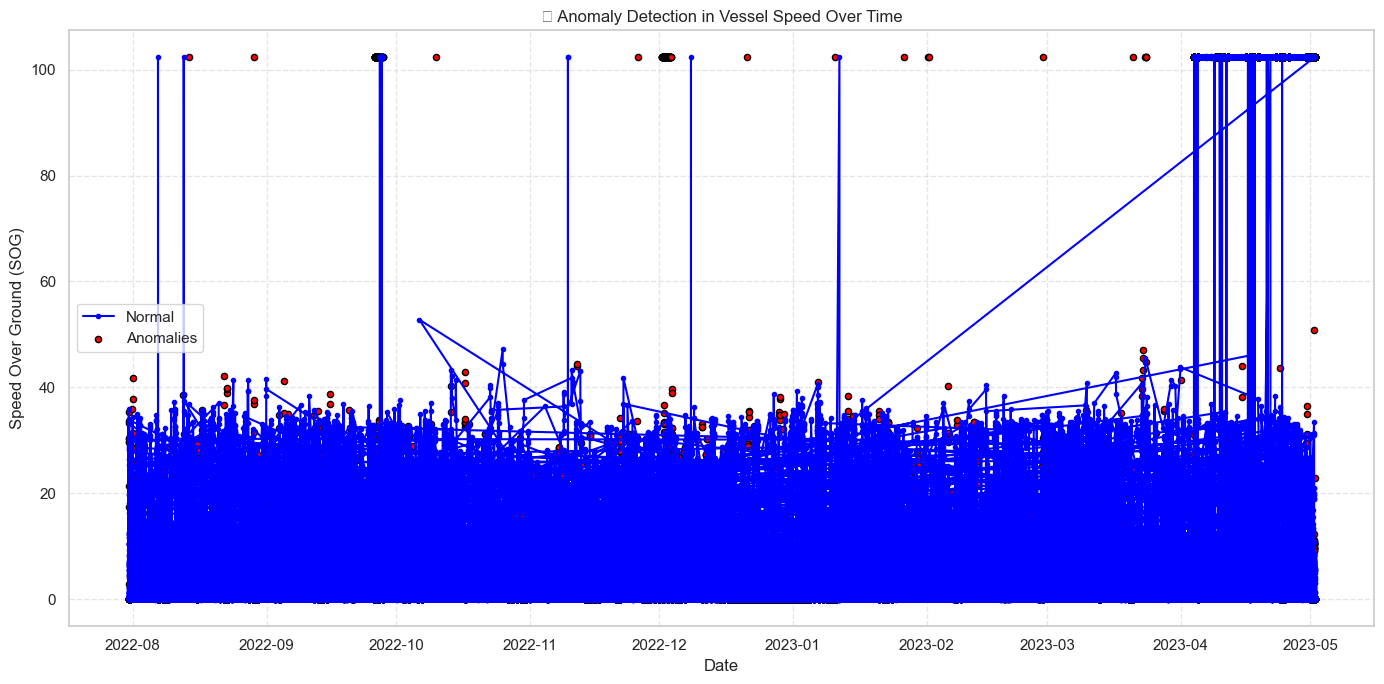

In [82]:
# Plot Daily AIS Signals with Anomalies Highlighted
plt.figure(figsize=(14, 7))

# Plot Normal Data
normal_data = df2[df2['Anomaly'] == 1]
plt.plot(normal_data['BaseDateTime'], normal_data['SOG'], 
         linestyle='-', marker='.', color='blue', label='Normal')

# Plot Anomalous Data
anomalous_data = df2[df2['Anomaly'] == -1]
plt.scatter(anomalous_data['BaseDateTime'], anomalous_data['SOG'], 
            color='red', label='Anomalies', s=20, edgecolor='black')

# Plot Styling
plt.xlabel('Date')
plt.ylabel('Speed Over Ground (SOG)')
plt.title('🚨 Anomaly Detection in Vessel Speed Over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


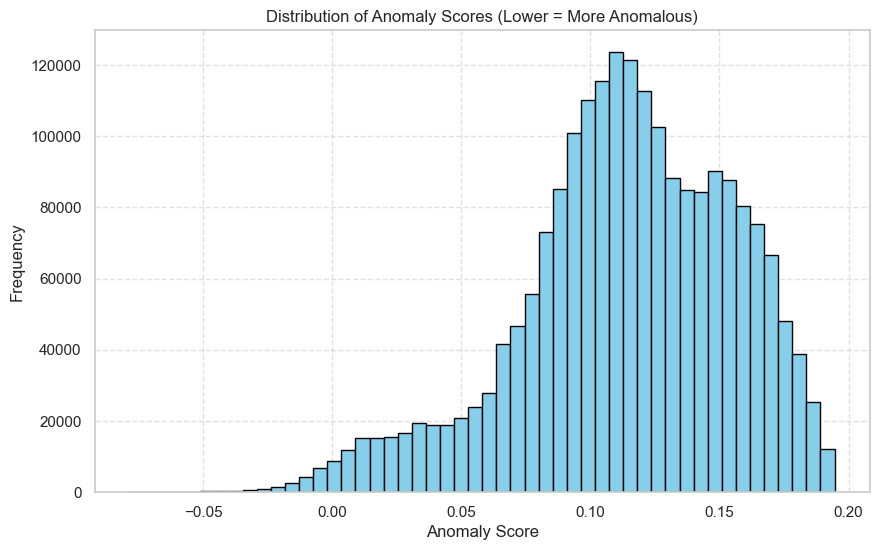

In [83]:
# Extract anomaly scores (lower score = more anomalous)
anomaly_scores = iso_forest.decision_function(df_scaled)

# Plot the distribution of anomaly scores

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores (Lower = More Anomalous)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Evaluate the proportion of detected anomalies relative to the total dataset. Expected ratio should be close to the model's contamination parameter (e.g., 0.01).

In [84]:
# Calculate the ratio of detected anomalies
anomaly_ratio = (df2['Anomaly'] == -1).sum() / len(df2)
print(f"📊 Anomaly Detection Ratio: {anomaly_ratio:.4f}")


📊 Anomaly Detection Ratio: 0.0100


C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\2486275735.py:20: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


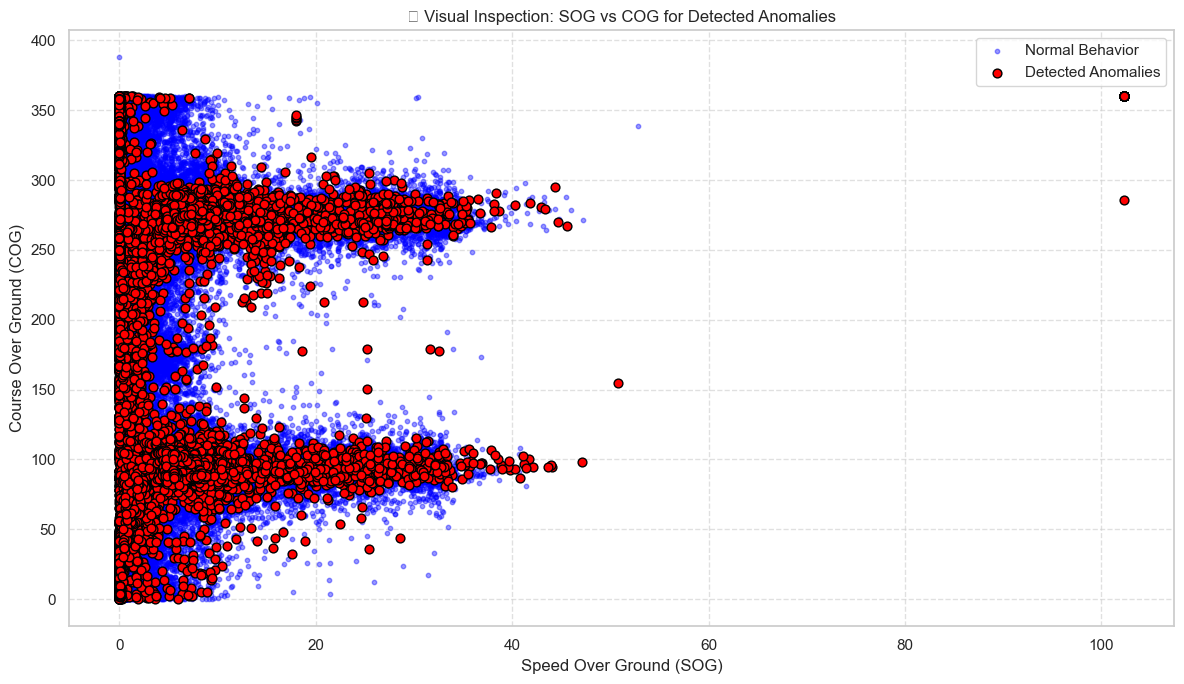

In [85]:
import matplotlib.pyplot as plt

# Plot SOG vs COG to visually inspect anomalies
plt.figure(figsize=(12, 7))

# Plot Normal Vessel Behavior
plt.scatter(normal_data['SOG'], normal_data['COG'], 
            color='blue', s=10, alpha=0.4, label='Normal Behavior')

# Plot Detected Anomalies
plt.scatter(anomalous_data['SOG'], anomalous_data['COG'], 
            color='red', s=40, edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Course Over Ground (COG)')
plt.title('🚨 Visual Inspection: SOG vs COG for Detected Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\2138275621.py:18: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\2138275621.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


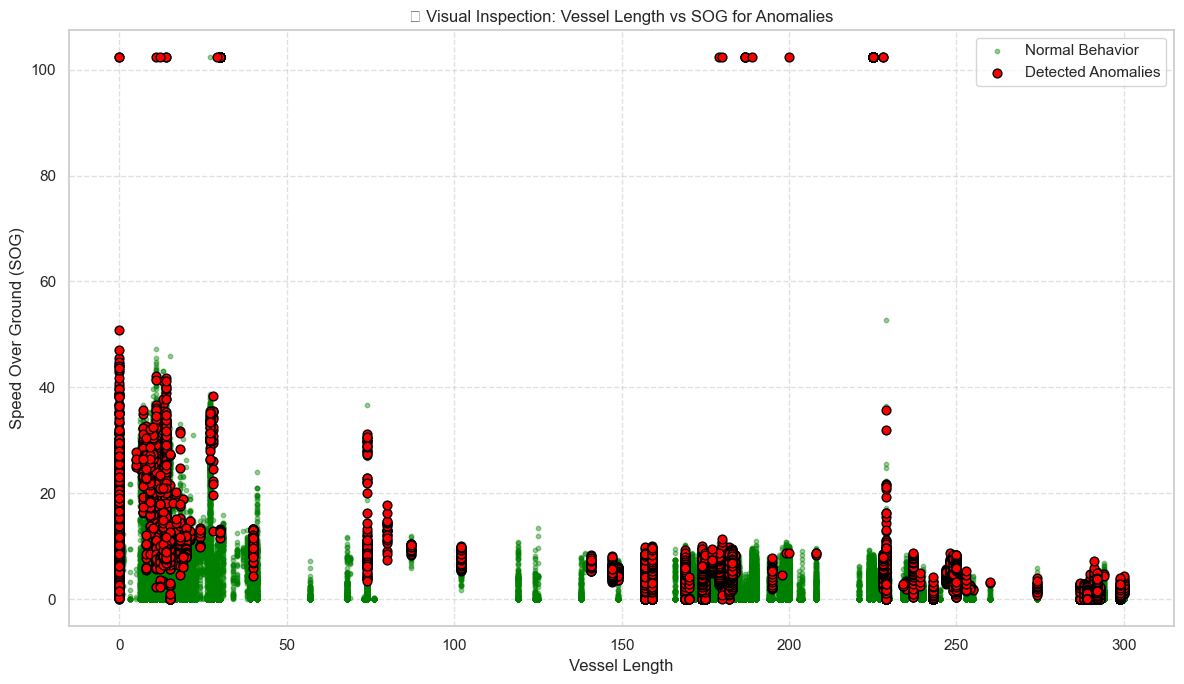

In [86]:
# Plot SOG vs Length to detect size-speed mismatches
plt.figure(figsize=(12, 7))

# Plot Normal Data
plt.scatter(normal_data['Length'], normal_data['SOG'], 
            color='green', s=10, alpha=0.4, label='Normal Behavior')

# Plot Anomalous Data
plt.scatter(anomalous_data['Length'], anomalous_data['SOG'], 
            color='red', s=40, edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Vessel Length')
plt.ylabel('Speed Over Ground (SOG)')
plt.title('🚨 Visual Inspection: Vessel Length vs SOG for Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\4212195970.py:18: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\4212195970.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


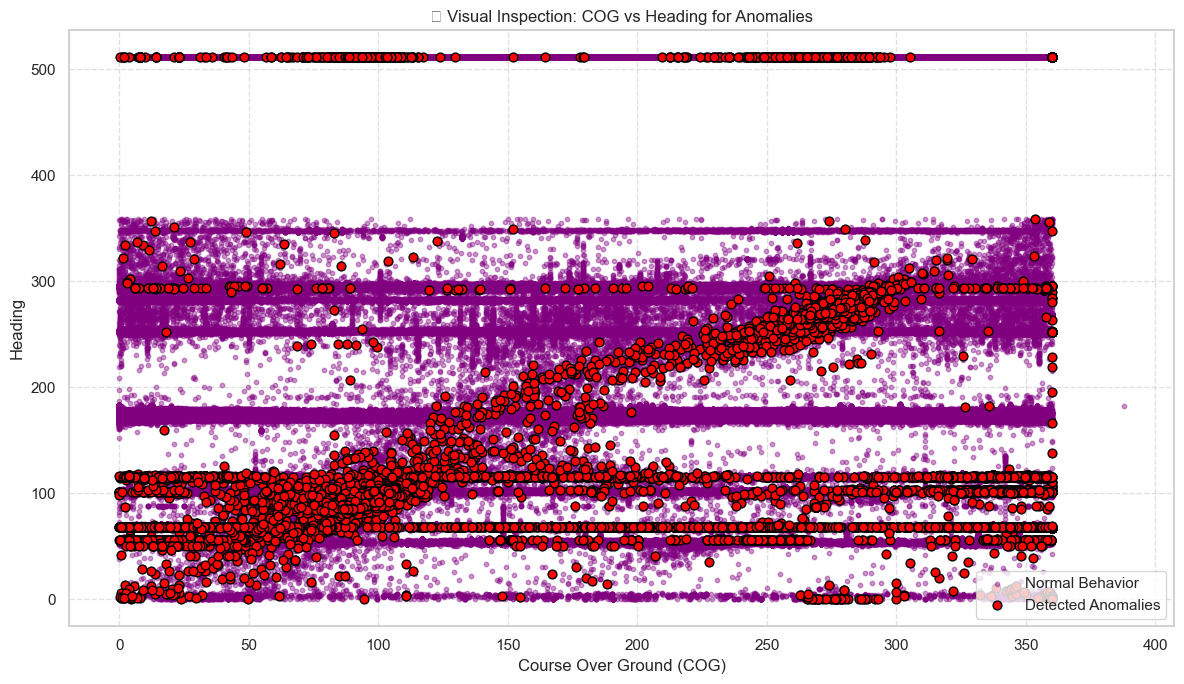

In [87]:
# Plot COG vs Heading to spot navigational inconsistencies
plt.figure(figsize=(12, 7))

# Plot Normal Data
plt.scatter(normal_data['COG'], normal_data['Heading'], 
            color='purple', s=10, alpha=0.4, label='Normal Behavior')

# Plot Anomalous Data
plt.scatter(anomalous_data['COG'], anomalous_data['Heading'], 
            color='red', s=40, edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Course Over Ground (COG)')
plt.ylabel('Heading')
plt.title('🚨 Visual Inspection: COG vs Heading for Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [88]:
from sklearn.ensemble import IsolationForest

# Reduce contamination to avoid over-flagging
iso_forest = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
iso_forest.fit(df_scaled)

# Reapply predictions
df2['Anomaly'] = iso_forest.predict(df_scaled)


🚨 Number of anomalies detected after adjustment: 10512


C:\Users\joyji\AppData\Local\Temp\ipykernel_18084\3513903867.py:38: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


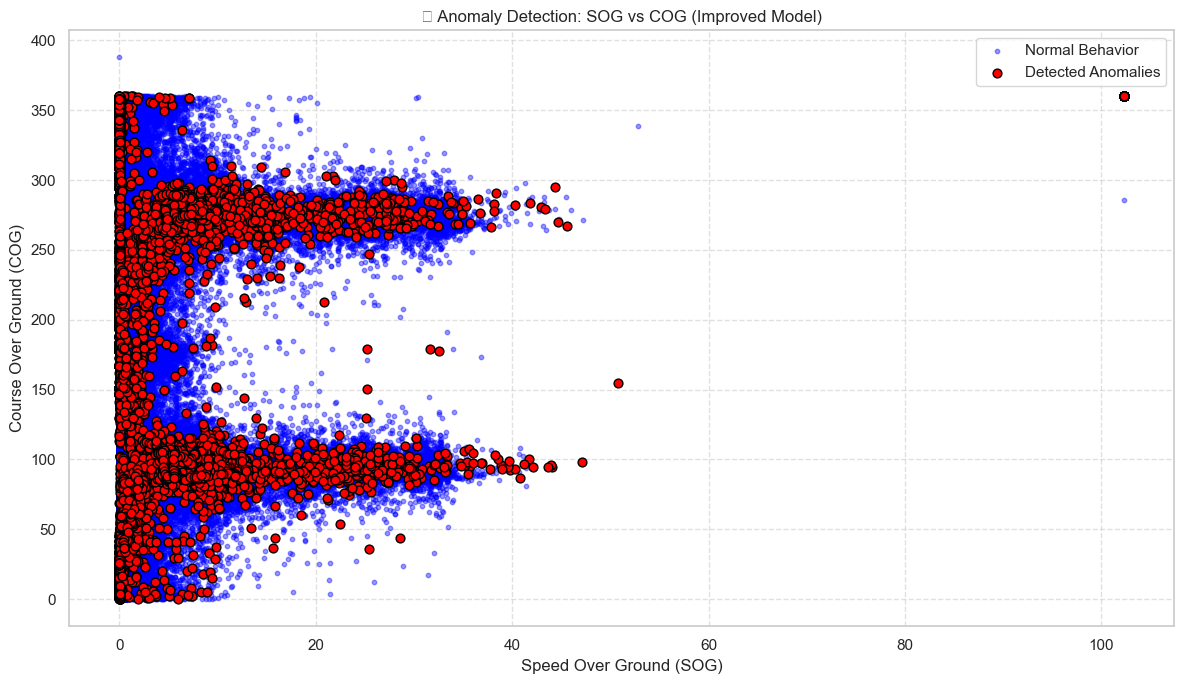

In [90]:


# 1️⃣ Model Training: Isolation Forest with Adjusted Contamination

# Initialize Isolation Forest with lower contamination (0.005)
iso_forest = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)

# Train the model on the scaled dataset
iso_forest.fit(df_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
df2['Anomaly'] = iso_forest.predict(df_scaled)

# Count detected anomalies
anomaly_count = (df2['Anomaly'] == -1).sum()
print(f"🚨 Number of anomalies detected after adjustment: {anomaly_count}")

# Split normal and anomalous data for plotting
normal_data = df2[df2['Anomaly'] == 1]
anomalous_data = df2[df2['Anomaly'] == -1]

# 2️⃣ Visualization: SOG vs. COG Plot

plt.figure(figsize=(12, 7))

# Plot Normal Vessel Behavior
plt.scatter(normal_data['SOG'], normal_data['COG'], 
            color='blue', s=10, alpha=0.4, label='Normal Behavior')

# Plot Detected Anomalies
plt.scatter(anomalous_data['SOG'], anomalous_data['COG'], 
            color='red', s=40, edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Course Over Ground (COG)')
plt.title('🚨 Anomaly Detection: SOG vs COG (Improved Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Why One-Class SVM?
Unsupervised Learning: Works well when only normal data is available.
Boundary-Based Detection: Learns the boundary of normal data and flags points that fall outside as anomalies.
Captures Non-Linear Patterns: With kernel tricks, it can detect complex anomalies.


In [ ]:
from sklearn.svm import OneClassSVM


# 1️⃣ Initialize and Train the One-Class SVM
svm_model = OneClassSVM(kernel='rbf',  # Radial Basis Function Kernel
                        gamma='scale',  # Auto-scale gamma
                        nu=0.01)       # Approx. 1% of the data are anomalies

# Train the model on scaled data
svm_model.fit(df_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
df2['Anomaly_SVM'] = svm_model.predict(df_scaled)

# Count detected anomalies
svm_anomaly_count = (df2['Anomaly_SVM'] == -1).sum()
print(f"🚨 Number of anomalies detected by One-Class SVM: {svm_anomaly_count}")

# 2️⃣ Visualization: SOG vs. COG Plot

# Split normal and anomalous data for plotting
normal_data_svm = df2[df2['Anomaly_SVM'] == 1]
anomalous_data_svm = df2[df2['Anomaly_SVM'] == -1]

plt.figure(figsize=(12, 7))

# Plot Normal Behavior
plt.scatter(normal_data_svm['SOG'], normal_data_svm['COG'], 
            color='blue', s=10, alpha=0.4, label='Normal Behavior')

# Plot Detected Anomalies
plt.scatter(anomalous_data_svm['SOG'], anomalous_data_svm['COG'], 
            color='orange', s=40, edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Course Over Ground (COG)')
plt.title('🚨 One-Class SVM Anomaly Detection: SOG vs COG')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [27]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Data Preparation

# Select relevant features for prediction
features = ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft', 'hour', 'day_of_week', 'month']
target = 'SOG'  # Predicting Speed Over Ground

# Prepare feature matrix and target variable
X = df2[features]
y = df2[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2️⃣ Model Training with SVR

# Initialize SVR model
svr_model = SVR(kernel='rbf', gamma='scale', C=1000, epsilon=0.5)

# Train the SVR model
svr_model.fit(X_train, y_train)

# 3️⃣ Prediction and Error Calculation

# Predict on test data
y_pred = svr_model.predict(X_test)

# Calculate prediction errors
errors = np.abs(y_test - y_pred)

# Define anomaly threshold (mean + 2*std)
threshold = np.mean(errors) + 2 * np.std(errors)

# Flag anomalies
anomalies = errors > threshold

print(f"🚨 Number of anomalies detected: {np.sum(anomalies)}")

# 4️⃣ Visualization: Actual vs Predicted with Anomalies

plt.figure(figsize=(12, 7))

# Plot normal predictions
plt.scatter(y_test[~anomalies], y_pred[~anomalies], color='blue', alpha=0.4, label='Normal Behavior')

# Plot detected anomalies
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Actual SOG')
plt.ylabel('Predicted SOG')
plt.title('🚨 SVR-Based Anomaly Detection: Actual vs Predicted SOG')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


KeyError: "['hour', 'day_of_week', 'month'] not in index"